## 2110235504 - RUBA SAAD EDDIN
## TMH3232 - MAKINA ÖĞRENMESİ - ÖDEV 
 

# Sleep Health And Lifestyle Dataset
# Uyku Sağlığı ve Yaşam Tarzı Veri Sitesi
* Uyku, vücudun kendini yenilediği, bağışıklık sistemini güçlendirdiği ve beyin fonksiyonlarını düzenlediği kritik bir süreçtir. Yeterli uyku, zihinsel netlik, duygusal denge ve fiziksel sağlık için önemlidir. Ayrıca, uyku kalitesi ve süresi genel enerji seviyelerini, odaklanma yeteneğini, öğrenme kapasitesini ve genel yaşam kalitesini önemli ölçüde etkiler. Uyku eksikliği ise stres, zihinsel bulanıklık, duygusal dalgalanmalar ve sağlık sorunlarına yol açabilir.


* Uyku, genel sağlığımızın korunmasında hayati bir rol oynar. Uyku sağlığını ve yaşam tarzını etkileyen faktörleri anlamak, uyku düzenimizi optimize etme konusunda değerli bilgiler sağlayabilir. Burada Uyku Sağlığı ve Yaşam Tarzı veri kümesinin analizini yaparak uyku süresi, fiziksel aktivite, stres seviyeleri ve uyku kalitesi arasındaki ilişkileri ortaya çıkarıyoruz.

* bireylerin uyku süresi, uyku kalitesi, fiziksel aktivite, stres düzeyi, BMI, kan basıncı, kalp atış hızı, günlük adım sayısı ve uyku bozuklukları hakkında bilgiler içeren, 14 sütun ve 374 satırdan oluşan ( Uyku Sağlığı ve Yaşam Tarzı ) Veri Setisidir , Bu faktörler arasındaki ilişkilerin analiz edilmesi ve anlaşılması, uyku sağlığını ve yaşam tarzını belirlemek için kullanılabilir.

In [367]:
# import kütüphanesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

## Genel bakış

In [368]:
#read data set
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
df.head(20)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


In [369]:
# veri setinin temel bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


### verilerin anlami
|Veri|Anlamı|
|------|------|
|Person ID|ID|
|Gender|Cinsiyet|
|Age|Yaş|
|Occupation|Meslek|
|Sleep Duration|Uyku Süresi|
|Quality of Sleep|Uyku Kalitesi|
|Physical Activity Level|Fiziksel Aktivite Düzeyi|
|Stress Level|Stres Seviyesi|
|BMI Category|BMI Kategorisi|
|Blood Pressure|Kan Basıncı|
|Heart Rate|Kalp Atış Hızı|
|Daily Steps|Günlük Adımlar|
|Sleep Disorder|Uyku düzensizliği|

## Özellik seçimi

In [370]:
# Person ID gereksiz görünüyor. 
# drop `Person ID` 
df.drop('Person ID', axis=1, inplace=True)

## Veri temizliği ve dönüşümü

In [371]:
# missing values

df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## Kayıp verilerin tespiti ve dönüşümü

In [372]:
### Sleep Disorder 'de None yerine NaN olmasi gerekiyor .
missing_values=['None']
df=pd.read_csv("Sleep_health_and_lifestyle_dataset.csv",na_values=missing_values)
df.drop("Person ID",axis=1,inplace=True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [373]:
df.isna().sum()

Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Sleep Disorder'de kayip verileri uyku problemi olmayan kişiler için bir veri değeridir
bu yüzden burada Nan yerine (No Sleep Disorder) 'Uyku Bozukluğu Yok' olacak  

In [374]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('No Sleep Disorder')

df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

### Veri tiplerinin dönüşümü

In [375]:
print(df.dtypes)

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


In [376]:
# 'BMI Category' sütunundaki 'Normal' ve 'Normal Weight' ayni anlamda oldugu icin 
# 'Normal Weight' 'Normal'e dönüştürecek

print(df['BMI Category'].unique())

['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [377]:
for i in range (373):
    if df["BMI Category"][i] == 'Normal Weight' :
        try :
            df["BMI Category"][i]='Normal'
        except:
            pass
print(df['BMI Category'].unique())                  

C:\Users\pc\AppData\Local\Temp\ipykernel_6044\2222930224.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BMI Category"][i]='Normal'


['Overweight' 'Normal' 'Obese']


In [379]:
# "Blood Pressure" sütunundan Systolic ve Diastolic kan basıncı değerlerini ayri ayri olacak
df['Systolic'] = df['Blood Pressure'].str.split('/').str[0].astype(int)
df['Diastolic'] = df['Blood Pressure'].str.split('/').str[1].astype(int)

df.loc[: ,['Systolic','Diastolic']]

,Systolic,Diastolic
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90
...,...,...
369,140,95
370,140,95
371,140,95
372,140,95


In [380]:
# veri site'ye yeni sutun ekleyecegeyiz 'Diastolic'
for i in range(len(df)):
    if df.loc[i, 'Systolic'] <= 120 and df.loc[i, 'Diastolic'] <= 80:
        df.loc[i, 'BP Category'] = 'Normal'
    elif 120 < df.loc[i, 'Systolic'] <= 129 and df.loc[i, 'Diastolic'] <= 80:
        df.loc[i, 'BP Category'] = 'Elevated'
    elif 130 <= df.loc[i, 'Systolic'] <= 139 or (80 < df.loc[i, 'Diastolic'] < 89):
        df.loc[i, 'BP Category'] = 'Stage 1'
    else:
        df.loc[i, 'BP Category'] = 'Stage 2'

In [381]:
# 'Blood_Pressure' sütünu silmek 
df.drop(columns=['Blood Pressure'], axis=1, inplace=True)

In [382]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,126,83,Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80,Elevated
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80,Elevated
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Stage 2
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Stage 2


### veri tiplerini dönüştürelim

In [383]:
print(df.dtypes)

Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
Systolic                     int32
Diastolic                    int32
BP Category                 object
dtype: object


### Tekrarlayan verilerin kaldırılması

In [384]:
print(df.duplicated())

0      False
1      False
2       True
3      False
4       True
       ...  
369     True
370     True
371     True
372     True
373     True
Length: 374, dtype: bool


In [385]:
print(df[df.duplicated()])

     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
2      Male   28                Doctor             6.2                 6   
4      Male   28  Sales Representative             5.9                 4   
8      Male   29                Doctor             7.8                 7   
9      Male   29                Doctor             7.8                 7   
11     Male   29                Doctor             7.8                 7   
..      ...  ...                   ...             ...               ...   
369  Female   59                 Nurse             8.1                 9   
370  Female   59                 Nurse             8.0                 9   
371  Female   59                 Nurse             8.1                 9   
372  Female   59                 Nurse             8.1                 9   
373  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
2               

In [386]:
df.drop_duplicates(inplace=True)
print(df)

     Gender  Age            Occupation  Sleep Duration  Quality of Sleep  \
0      Male   27     Software Engineer             6.1                 6   
1      Male   28                Doctor             6.2                 6   
3      Male   28  Sales Representative             5.9                 4   
5      Male   28     Software Engineer             5.9                 4   
6      Male   29               Teacher             6.3                 6   
..      ...  ...                   ...             ...               ...   
358  Female   59                 Nurse             8.0                 9   
359  Female   59                 Nurse             8.1                 9   
360  Female   59                 Nurse             8.2                 9   
364  Female   59                 Nurse             8.0                 9   
366  Female   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0               

In [387]:
# sıra düzetmek için 
df.reset_index(inplace=True,drop=True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,BP Category
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,No Sleep Disorder,126,83,Stage 1
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,No Sleep Disorder,125,80,Elevated
2,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,Stage 2
3,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,140,90,Stage 2
4,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,140,90,Stage 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,No Sleep Disorder,140,95,Stage 2
128,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,No Sleep Disorder,140,95,Stage 2
129,Female,59,Nurse,8.2,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,Stage 2
130,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,Stage 2


### Kategorik verilerin dönüşümü

In [388]:
df=pd.get_dummies(df,columns=["Gender"])
print(df)

     Age            Occupation  Sleep Duration  Quality of Sleep  \
0     27     Software Engineer             6.1                 6   
1     28                Doctor             6.2                 6   
2     28  Sales Representative             5.9                 4   
3     28     Software Engineer             5.9                 4   
4     29               Teacher             6.3                 6   
..   ...                   ...             ...               ...   
127   59                 Nurse             8.0                 9   
128   59                 Nurse             8.1                 9   
129   59                 Nurse             8.2                 9   
130   59                 Nurse             8.0                 9   
131   59                 Nurse             8.1                 9   

     Physical Activity Level  Stress Level BMI Category  Heart Rate  \
0                         42             6   Overweight          77   
1                         60             

### Normalizasyon (min-max)
* normalized_data = (data - data.min()) / (data.max() - data.min())
* verinin minimum ve maksimum değerlerini kullanarak min-max normalizasyonunu gerçekleştirir
* sonucunda veri 0 ile 1 arasında bir aralığa dönüşür, 0 minimum değeri ve 1 maksimum değeri temsil eder. 

In [389]:
dfScaler=df.loc[:,["Age","Sleep Duration",'Quality of Sleep','Physical Activity Level','Systolic','Diastolic','Stress Level','Heart Rate','Daily Steps']]
x=(dfScaler-np.min(dfScaler))/(np.max(dfScaler)-np.min(dfScaler))
print(x)

         Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0    0.00000        0.111111               0.4                 0.200000   
1    0.03125        0.148148               0.4                 0.500000   
2    0.03125        0.037037               0.0                 0.000000   
3    0.03125        0.037037               0.0                 0.000000   
4    0.06250        0.185185               0.4                 0.166667   
..       ...             ...               ...                      ...   
127  1.00000        0.814815               1.0                 0.750000   
128  1.00000        0.851852               1.0                 0.750000   
129  1.00000        0.888889               1.0                 0.750000   
130  1.00000        0.814815               1.0                 0.750000   
131  1.00000        0.851852               1.0                 0.750000   

     Systolic  Diastolic  Stress Level  Heart Rate  Daily Steps  
0    0.407407       0.40         

C:\Users\pc\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\pc\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


## Özellik mühendisliği

In [390]:

dfNew=pd.concat([df.loc[:,["Occupation","BMI Category","Sleep Disorder","BP Category",'Gender_Female','Gender_Male']],x],axis=1)
dfNew

,Occupation,BMI Category,Sleep Disorder,BP Category,Gender_Female,Gender_Male,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Systolic,Diastolic,Stress Level,Heart Rate,Daily Steps
0,Software Engineer,Overweight,No Sleep Disorder,Stage 1,0,1,0.00000,0.111111,0.4,0.200000,0.407407,0.40,0.6,0.571429,0.171429
1,Doctor,Normal,No Sleep Disorder,Elevated,0,1,0.03125,0.148148,0.4,0.500000,0.370370,0.25,1.0,0.476190,1.000000
2,Sales Representative,Obese,Sleep Apnea,Stage 2,0,1,0.03125,0.037037,0.0,0.000000,0.925926,0.75,1.0,0.952381,0.000000
3,Software Engineer,Obese,Insomnia,Stage 2,0,1,0.03125,0.037037,0.0,0.000000,0.925926,0.75,1.0,0.952381,0.000000
4,Teacher,Obese,Insomnia,Stage 2,0,1,0.06250,0.185185,0.4,0.166667,0.925926,0.75,0.8,0.809524,0.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Nurse,Overweight,No Sleep Disorder,Stage 2,1,0,1.00000,0.814815,1.0,0.750000,0.925926,1.00,0.0,0.142857,0.571429
128,Nurse,Overweight,No Sleep Disorder,Stage 2,1,0,1.00000,0.851852,1.0,0.750000,0.925926,1.00,0.0,0.142857,0.571429
129,Nurse,Overweight,Sleep Apnea,Stage 2,1,0,1.00000,0.888889,1.0,0.750000,0.925926,1.00,0.0,0.142857,0.571429
130,Nurse,Overweight,Sleep Apnea,Stage 2,1,0,1.00000,0.814815,1.0,0.750000,0.925926,1.00,0.0,0.142857,0.571429


In [392]:
dfNew.to_csv("Sleep_health_and_lifestyle_dataset6.csv")

## Matplotlib
*  Matplotlib kullanarak verileri grafikle gösteceğiz 

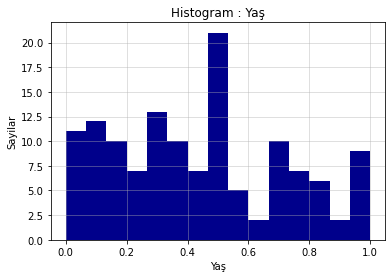

In [393]:
# Veri kümesindeki yaş
plt.hist(dfNew['Age'],color='darkblue',bins =15)
plt.title("Histogram : Yaş")
plt.xlabel("Yaş")
plt.ylabel("Sayilar")
plt.grid(alpha=0.5)
plt.show()

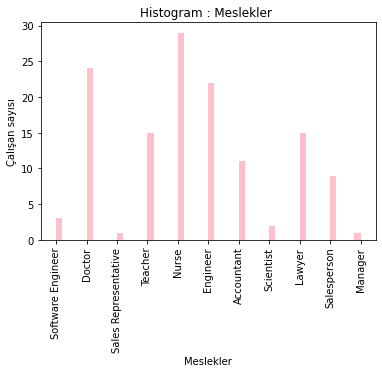

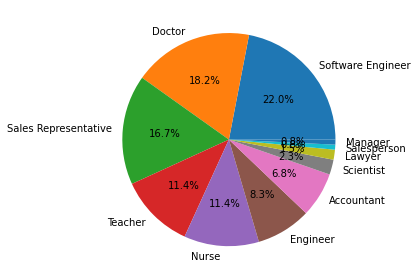

In [394]:
# Veri kümesindeki Meslekler 
plt.hist(dfNew['Occupation'],color='pink',bins = 50)
plt.title("Histogram : Meslekler ")
plt.tick_params(axis='x', rotation=90)
plt.xlabel("Meslekler")
plt.ylabel("Çalışan sayısı")
plt.show()
plt.pie(dfNew['Occupation'].value_counts().values, labels=df.Occupation.unique(), autopct='%1.1f%%')
plt.tight_layout()
plt.show()

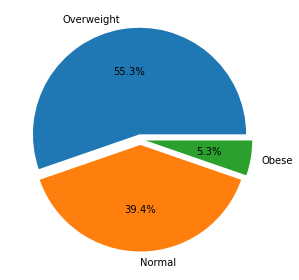

In [395]:
# Farkli BMI Kategorilerinin Oranı 
plt.pie(dfNew['BMI Category'].value_counts().values, labels=dfNew['BMI Category'].unique(), autopct='%1.1f%%', explode=[0.05, 0.05, 0.05])
plt.tight_layout()
plt.show()

## Linear Regresyon
* Eğri uydurma olarak çevirilebilir , İki veya daha fazla değişken arasındaki ilişkiyi ortaya koymayı amaçlar.
* İlişkiye ait en uygun fonksiyonu bulmaya çalışır. 

In [396]:
df=pd.read_csv("Sleep_health_and_lifestyle_dataset6.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Occupation,BMI Category,Sleep Disorder,BP Category,Gender_Female,Gender_Male,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Systolic,Diastolic,Stress Level,Heart Rate,Daily Steps
0,Software Engineer,Overweight,No Sleep Disorder,Stage 1,0,1,0.00000,0.111111,0.4,0.200000,0.407407,0.40,0.6,0.571429,0.171429
1,Doctor,Normal,No Sleep Disorder,Elevated,0,1,0.03125,0.148148,0.4,0.500000,0.370370,0.25,1.0,0.476190,1.000000
2,Sales Representative,Obese,Sleep Apnea,Stage 2,0,1,0.03125,0.037037,0.0,0.000000,0.925926,0.75,1.0,0.952381,0.000000
3,Software Engineer,Obese,Insomnia,Stage 2,0,1,0.03125,0.037037,0.0,0.000000,0.925926,0.75,1.0,0.952381,0.000000
4,Teacher,Obese,Insomnia,Stage 2,0,1,0.06250,0.185185,0.4,0.166667,0.925926,0.75,0.8,0.809524,0.071429


In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Occupation               132 non-null    object 
 1   BMI Category             132 non-null    object 
 2   Sleep Disorder           132 non-null    object 
 3   BP Category              132 non-null    object 
 4   Gender_Female            132 non-null    int64  
 5   Gender_Male              132 non-null    int64  
 6   Age                      132 non-null    float64
 7   Sleep Duration           132 non-null    float64
 8   Quality of Sleep         132 non-null    float64
 9   Physical Activity Level  132 non-null    float64
 10  Systolic                 132 non-null    float64
 11  Diastolic                132 non-null    float64
 12  Stress Level             132 non-null    float64
 13  Heart Rate               132 non-null    float64
 14  Daily Steps              1

## Regresyon değerlendirme yöntemleri 
* R2 (R-squared): Modelin bağımsız değişkenler tarafından açıklanan varyansın oranı. En yüksek skor 1 dir ve en iyi skordur. 1 e ne kadar yakın ise o kadar iyi fit edilmiştir. Genelde 0-1 arası değer verir.
* MAE (Mean Absolute Error): Tahminler ile gerçek değerler arasındaki mutlak farkın ortalaması.
* MSE (Mbir modelin performansını ölçmek veya tahminlerin gerçek değerlere ne kadar yakın olduğunu değerlendirmek için kullanılan farklı metriklerdirean Squared Error): Tahminler ile gerçek değerler arasındaki farkların karelerinin ortalaması.
* RMSE (Root Mean Squared Error): MSE'nin karekökü; tahminler ile gerçek değerler arasındaki farkların ortalaması.
* MAPE (Mean Absolute Percentage Error): Tahminler ile gerçek değerler arasındaki mutlak yüzde farklarının ortalaması.



* bir modelin performansını ölçmek veya tahminlerin gerçek değerlere ne kadar yakın olduğunu değerlendirmek için kullanılan farklı metriklerdir
* R2 ne kadar yüksekse, model o kadar iyi uyum sağlar ,
* MAE ve RMSE ne kadar düşükse, tahminler o kadar doğru olur .
* MAPE, yüzde cinsinden tahmin hatalarının ortalama büyüklüğünü gösterir.

In [398]:
# sayısal değerler = 'Gender_Female','Gender_Male','Age','Quality of Sleep','Physical Activity Level','Systolic','Diastolic','Stress Level','Heart Rate','Daily Steps'

x = df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11,12,13,14]]
y = df.iloc[:,7] # Sleep Duration : Uyku Süresi
type_object = [0, 1, 2, 3] # sayisal olmayan sütünler , Kategorik yapmak için 
x = pd.get_dummies(x, columns=x.columns[type_object])


In [399]:
x.head()

,Gender_Female,Gender_Male,Age,Quality of Sleep,Physical Activity Level,Systolic,Diastolic,Stress Level,Heart Rate,Daily Steps,...,BMI Category_Normal,BMI Category_Obese,BMI Category_Overweight,Sleep Disorder_Insomnia,Sleep Disorder_No Sleep Disorder,Sleep Disorder_Sleep Apnea,BP Category_Elevated,BP Category_Normal,BP Category_Stage 1,BP Category_Stage 2
0,0,1,0.00000,0.4,0.200000,0.407407,0.40,0.6,0.571429,0.171429,...,0,0,1,0,1,0,0,0,1,0
1,0,1,0.03125,0.4,0.500000,0.370370,0.25,1.0,0.476190,1.000000,...,1,0,0,0,1,0,1,0,0,0
2,0,1,0.03125,0.0,0.000000,0.925926,0.75,1.0,0.952381,0.000000,...,0,1,0,0,0,1,0,0,0,1
3,0,1,0.03125,0.0,0.000000,0.925926,0.75,1.0,0.952381,0.000000,...,0,1,0,1,0,0,0,0,0,1
4,0,1,0.06250,0.4,0.166667,0.925926,0.75,0.8,0.809524,0.071429,...,0,1,0,1,0,0,0,0,0,1


### Multiple linear regresyon
* y=b0+b1*x1+b2*x2 
* bağımlı bir değişken ile birden fazla bağımsız değişken arasındaki ilişkiyi modellemek için kullanılan yöntemdir

In [400]:
mlr=LinearRegression()
mlr.fit(x,y)

LinearRegression()

In [401]:
print(mlr.intercept_,mlr.coef_)

0.11695172580298557 [-0.01939262  0.01939262  0.29198979  0.40872204  0.23670989  0.41560283
 -0.18127744 -0.27407954  0.09412419 -0.45819586 -0.14161826  0.05644923
  0.06997527  0.06441876 -0.03575411 -0.03693716  0.09984247 -0.00261598
 -0.00329404 -0.00551283 -0.06495335  0.14338492 -0.17914688  0.03576195
 -0.01038987  0.000751    0.00963887 -0.06672525  0.23095848 -0.06104487
 -0.10318836]


In [402]:
mlr_pred=mlr.predict(x)

print("mlr r2:",r2_score(y,mlr_pred))
print("mlr mae:",mean_absolute_error(y,mlr_pred))
print("mlr mse:",mean_squared_error(y,mlr_pred))
print("mlr rmse:",(mean_squared_error(y,mlr_pred))**0.5)
print("mlr mape:",mean_absolute_percentage_error(y,mlr_pred))

mlr r2: 0.8952488789130265
mlr mae: 0.07575977211534307
mlr mse: 0.008572497453868079
mlr rmse: 0.09258778242224013
mlr mape: 1685628962699.2402


### Polynominal linear regresyon
* y = b0 + b1x + b2*x^2 +....+ bn*x^n
* bağımsız değişkenleri polinom dereceleriyle (kare, küp, vb.) artırarak kullanır. 

In [403]:
plr=PolynomialFeatures(degree=3)

x_pol=plr.fit_transform(x)
lr_pol=LinearRegression()
lr_pol.fit(x_pol,y)

LinearRegression()

In [404]:
pol_pred=lr_pol.predict(x_pol)

print("pol r2:",r2_score(y,pol_pred))
print("pol mae:",mean_absolute_error(y,pol_pred))
print("pol mse:",mean_squared_error(y,pol_pred))
print("pol rmse:",(mean_squared_error(y,pol_pred))**0.5)
print("pol mape:",mean_absolute_percentage_error(y,pol_pred))

pol r2: 0.9962062244912647
pol mae: 0.011064340670903498
pol mse: 0.00031047048042739305
pol rmse: 0.01762017254249779
pol mape: 13177740567.31693


## Karar ağaçları

### Random Forest Regressor :
* birçok karar ağacının (decision tree) bir araya gelmesiyle oluşturulur ve bu ağaçların birleşimiyle tahminler yapar.

### Decision Tree Regressor :
* veri setindeki özellikleri ve değerleri kullanarak bir ağaç yapısı oluşturur. Tahmin yaparken, bu ağaç yapısını kullanarak özelliklerden sonuca ulaşır.
* tek başına kullanıldığında aşırı uyum (overfitting) olabilir .

In [415]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(x,y)

tree_pred=tree_reg.predict(x)
print("tree r2:",r2_score(y,tree_pred))
print("tree mae:",mean_absolute_error(y,tree_pred))
print("tree mape:",mean_absolute_percentage_error(y,tree_pred))
print("tree mse:",mean_squared_error(y,tree_pred))
print("tree rmse:",(mean_squared_error(y,tree_pred))**0.5)

tree r2: 0.9964444410239933
tree mae: 0.010101010101010095
tree mape: 0.040685426897721436
tree mse: 0.00029097559961757473
tree rmse: 0.017058006906364376


* yorum :  R2, modelin veri setine iyi uyum sağladığını gösterir.
* MAE , modelin ortalama olarak tahminlerinin gerçek değerlerden 0.0101 farkli 
* MAPE , modelin ortalama olarak yüzde olarak tahminlerinin gerçek değerlerden %4.07 oranında farklılık var
* MSE  , modelin ortalama olarak tahminlerinin gerçek değerlerden 0.000291 karesi kadar uzaklıkta olduğunu gösterir.
* RMSE , modelin tahminlerinin genellikle düşük bir hata ile gerçek değerlere yakın olduğunu soyler .

## mlr, plr, dt, rf  için r2, mae, mape , rmse ve mse sonuçlar almak

In [416]:
mlr=LinearRegression()
mlr.fit(x,y)
mlr_pred=mlr.predict(x)

plr = PolynomialFeatures(degree=3)
x_pol = plr.fit_transform(x)
lr_pol = LinearRegression()
lr_pol.fit(x_pol, y)
lr_pol_pred = lr_pol.predict(x_pol)

dt=DecisionTreeRegressor()
dt.fit(x,y)
dt_pred=dt.predict(x)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x,y)
rf_pred=rf.predict(x)

In [417]:
print("plr:","r2:",r2_score(y,lr_pol_pred),"mae:",mean_absolute_error(y,lr_pol_pred),'rmse:',(mean_squared_error(y,lr_pol_pred))**0.5,' mape:',mean_absolute_percentage_error(y,lr_pol_pred),'mse',mean_squared_error(y,lr_pol_pred))
print("mlr:","r2:",r2_score(y,mlr_pred),"mae:",mean_absolute_error(y,mlr_pred),'rmse:',(mean_squared_error(y,mlr_pred))**0.5,' mape:',mean_absolute_percentage_error(y,mlr_pred),'mse',mean_squared_error(y,mlr_pred))
print("dt:","r2:",r2_score(y,dt_pred),"mae:",mean_absolute_error(y,dt_pred),'rmse:',(mean_squared_error(y,dt_pred))**0.5,' mape:',mean_absolute_percentage_error(y,dt_pred),'mse',mean_squared_error(y,dt_pred))
print("rf:","r2:",r2_score(y,rf_pred),"mae:",mean_absolute_error(y,rf_pred),'rmse:',(mean_squared_error(y,rf_pred))**0.5,' mape:',mean_absolute_percentage_error(y,rf_pred),'mse',mean_squared_error(y,rf_pred))

plr: r2: 0.9962062244912647 mae: 0.011064340670903498 rmse: 0.01762017254249779  mape: 13177740567.31693 mse 0.00031047048042739305
mlr: r2: 0.8952488789130265 mae: 0.07575977211534307 rmse: 0.09258778242224013  mape: 1685628962699.2402 mse 0.008572497453868079
dt: r2: 0.9964444410239933 mae: 0.010101010101010095 rmse: 0.017058006906364376  mape: 0.040685426897721436 mse 0.00029097559961757473
rf: r2: 0.9931240513494375 mae: 0.018926239912350987 rmse: 0.023721418467460165  mape: 560212074860.041 mse 0.0005627056941083602


* yorum : plr r2 , fazla uyum sağlamış olabilir .
* mlr r2 , uyum sağladı .
* dt r2 , fazla uyum sağladi.
* rf r2 , fazla uyum sağladi .

## train test split
* veri setini eğitim ve test setlerine ayırmak için kullanılan bir fonksiyondur
* Modelin performansını değerlendirmek için test setini kullanır. modelin eğitim verilerine göre genelleştirme yeteneği test edilir.

In [418]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


mlr=LinearRegression()
mlr.fit(x_train,y_train)
mlr_pred=mlr.predict(x_test)

plr = PolynomialFeatures(degree=4) # uyumsuz sonuç olacak çünkü negatif sayi 
x_pol_train = plr.fit_transform(x_train)
x_test_pol = plr.transform(x_test)
lr_pol = LinearRegression()
lr_pol.fit(x_pol_train,y_train)
lr_pol_pred = lr_pol.predict(x_test_pol)

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

In [419]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("plr:","r2:",r2_score(y_test,lr_pol_pred),"mae:",mean_absolute_error(y_test,lr_pol_pred),'rmse:',(mean_squared_error(y_test,lr_pol_pred))**0.5,' mape:',mean_absolute_percentage_error(y_test,lr_pol_pred),'mse',mean_squared_error(y_test,lr_pol_pred))
print("mlr:","r2:",r2_score(y_test,mlr_pred),"mae:",mean_absolute_error(y_test,mlr_pred),'rmse:',(mean_squared_error(y_test,mlr_pred))**0.5,' mape:',mean_absolute_percentage_error(y_test,mlr_pred),'mse',mean_squared_error(y_test,mlr_pred))
print("dt:","r2:",r2_score(y_test,dt_pred),"mae:",mean_absolute_error(y_test,dt_pred),'rmse:',(mean_squared_error(y_test,dt_pred))**0.5,' mape:',mean_absolute_percentage_error(y_test,dt_pred),'mse',mean_squared_error(y_test,dt_pred))
print("rf:","r2:",r2_score(y_test,rf_pred),"mae:",mean_absolute_error(y_test,rf_pred),'rmse:',(mean_squared_error(y_test,rf_pred))**0.5,' mape:',mean_absolute_percentage_error(y_test,rf_pred),'mse',mean_squared_error(y_test,rf_pred))

plr: r2: -1.5886736627273294e+21 mae: 4683911045.990828 rmse: 10883322825.345404  mape: 16931559973.322157 mse 1.1844671572068424e+20
mlr: r2: 0.7891038864996676 mae: 0.10049719178842782 rmse: 0.12539448955024898  mape: 0.34153148730442934 mse 0.0157237780095675
dt: r2: 0.9645170374542382 mae: 0.03968253968253976 rmse: 0.051434449987363996  mape: 0.14993144591052415 mse 0.002645502645502648
rf: r2: 0.9613350776038938 mae: 0.040208868732678475 rmse: 0.05369115358124772  mape: 0.1441129985631442 mse 0.0028827399728851297


* yorum : plr r2 negatif değer veredi , uyumsuz sonuç veya model uygun olmadi .
* mlr r2 için  iyi uyum oldu , Modele yeni veriler eklendiğinde performansı değişebilir veya farklı sonuçlar verebilir .
* dt r2 için çok iyi uyum oldu , bu yüksek değerle, modelin aşırı uyuma (overfitting) olabilir .
* rf r2 için çok iyi uyum oldu , bu yüksek değerle, modelin aşırı uyuma (overfitting) olabilir .